In [1]:
import pandas as pd
import re
import nltk
import string
from collections import Counter
import unicodedata
import plotly.express as px

In [2]:
#Exploratory Data Analysis
df = pd.read_csv('IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<AxesSubplot:>

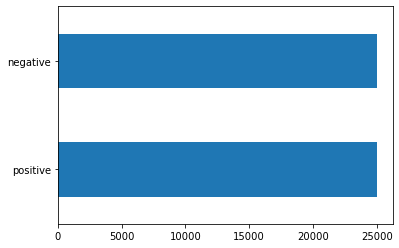

In [4]:
df['sentiment'].value_counts().plot(kind='barh')


In [31]:
#Let's see how CountVectorizer works with an example

from sklearn.feature_extraction.text import CountVectorizer

text = ['This is the first time I am exploring NLP','I hope to implement TFIDF',
       'Be Focussed is not stupid']

count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df_1 = pd.DataFrame(data = count_array,columns = count_vect.get_feature_names_out())
df_1.T

,0,1,2
am,1,0,0
be,0,0,1
exploring,1,0,0
first,1,0,0
focussed,0,0,1
hope,0,1,0
implement,0,1,0
is,1,0,1
nlp,1,0,0
not,0,0,1


In [30]:
#Let's see how CountVectorizer works with an example, also use stop words

from sklearn.feature_extraction.text import CountVectorizer

text = ['This is the first time I am exploring NLP','I hope to implement TFIDF',
       'Be Focussed is not stupid']

count_vect = CountVectorizer(stop_words = 'english')
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df_1 = pd.DataFrame(data = count_array,columns = count_vect.get_feature_names_out())
df_1.T

,0,1,2
exploring,1,0,0
focussed,0,0,1
hope,0,1,0
implement,0,1,0
nlp,1,0,0
stupid,0,0,1
tfidf,0,1,0
time,1,0,0


In [32]:
#Understanding ngram_range in CountVectorizer with an example

text = ['This is the first time, I. am. exploring NLP','I hope to implement TFIDF',
       'Be Focussed is not stupid']
count_vect = CountVectorizer(stop_words = 'english',ngram_range = (1,1))
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df_1 = pd.DataFrame(data = count_array,columns = count_vect.get_feature_names_out())
print(df_1.T)

#Using bigrams instead of unigrams for analysing text data
text = ['This is the first time,I. am. exploring NLP','I hope to implement TFIDF',
       'Be Focussed is not stupid']
count_vect = CountVectorizer(stop_words = 'english',ngram_range = (2,2))
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df_1 = pd.DataFrame(data = count_array,columns = count_vect.get_feature_names_out())
print('Using bigrams instead of unigrams for analysing text data')
df_1.T

           0  1  2
exploring  1  0  0
focussed   0  0  1
hope       0  1  0
implement  0  1  0
nlp        1  0  0
stupid     0  0  1
tfidf      0  1  0
time       1  0  0
Using bigrams instead of unigrams for analysing text data


,0,1,2
exploring nlp,1,0,0
focussed stupid,0,0,1
hope implement,0,1,0
implement tfidf,0,1,0
time exploring,1,0,0


In [36]:
#Regular expression states that we can have words that start with a-zA-Z0-9

from nltk.tokenize import RegexpTokenizer
s = "This is the first1 time2 I \ $ . * am exploring NLP 79 89."
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
token.tokenize(s)

['This',
 'is',
 'the',
 'first1',
 'time2',
 'I',
 'am',
 'exploring',
 'NLP',
 '79',
 '89']

In [22]:
#Creating the actual model and creating the features for the text data
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words = 'english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['review'])

       0  00  000  00000000000  0000000000001  00000001  00001  00015  000dm  \
0      0   0    0            0              0         0      0      0      0   
1      0   0    0            0              0         0      0      0      0   
2      0   0    0            0              0         0      0      0      0   
3      0   0    0            0              0         0      0      0      0   
4      0   0    0            0              0         0      0      0      0   
...   ..  ..  ...          ...            ...       ...    ...    ...    ...   
49995  0   0    0            0              0         0      0      0      0   
49996  0   0    0            0              0         0      0      0      0   
49997  0   0    0            0              0         0      0      0      0   
49998  0   0    0            0              0         0      0      0      0   
49999  0   0    0            0              0         0      0      0      0   

       000s  ...  zzzzip  zzzzz  zzzzzz

In [20]:
print(text_counts)

  (0, 74772)	1
  (0, 56931)	1
  (0, 97369)	2
  (0, 47925)	2
  (0, 58)	1
  (0, 64779)	6
  (0, 29727)	2
  (0, 52630)	3
  (0, 42348)	1
  (0, 75187)	2
  (0, 30582)	1
  (0, 39959)	1
  (0, 11794)	6
  (0, 89582)	1
  (0, 85827)	2
  (0, 12724)	1
  (0, 93782)	1
  (0, 78020)	1
  (0, 96301)	4
  (0, 79573)	1
  (0, 99207)	2
  (0, 92127)	1
  (0, 31520)	1
  (0, 40679)	1
  (0, 90152)	1
  :	:
  (49999, 93820)	1
  (49999, 51434)	1
  (49999, 45528)	1
  (49999, 30926)	1
  (49999, 6952)	1
  (49999, 40045)	1
  (49999, 61053)	1
  (49999, 44402)	1
  (49999, 44081)	1
  (49999, 31756)	1
  (49999, 5840)	1
  (49999, 91618)	1
  (49999, 49264)	1
  (49999, 84023)	1
  (49999, 56084)	1
  (49999, 73975)	1
  (49999, 29728)	1
  (49999, 13598)	1
  (49999, 15684)	1
  (49999, 30938)	1
  (49999, 37696)	1
  (49999, 73968)	1
  (49999, 59753)	1
  (49999, 20970)	1
  (49999, 100182)	1


In [6]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['sentiment'], test_size = 0.25,random_state = 5)

In [7]:
#Using Multinomial Naive Bayes Classifier for text analysis
from sklearn.naive_bayes import MultinomialNB

In [8]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [9]:
#Predicting the score
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [10]:
print(accuracy_score)

0.85936


In [37]:
#Accuracy of the unigram model is over 85%, we can try with bigram and trigram

#Creating the actual model and creating the features for the text data
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words = 'english',ngram_range = (1,2),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['review'])

#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['sentiment'], test_size = 0.25,random_state = 5)

#Using Multinomial Naive Bayes Classifier for text analysis
MNB_2 = MultinomialNB()
MNB_2.fit(X_train,Y_train)

#Predicting for new data and calculating accuracy
predicted = MNB_2.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(accuracy_score)

0.88088


In [38]:
#NGRAM_RANGE(1,2) change increased the accuray to 88% from 85%, we can try with (1,3) now

#Creating the actual model and creating the features for the text data
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words = 'english',ngram_range = (1,3),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['review'])

#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['sentiment'], test_size = 0.25,random_state = 5)

#Using Multinomial Naive Bayes Classifier for text analysis
MNB_3 = MultinomialNB()
MNB_3.fit(X_train,Y_train)

#Predicting for new data and calculating accuracy
predicted = MNB_3.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(accuracy_score)

0.88216


In [ ]:
#EXPLORING DIFFERENT TYPES OF NAIVE BAYES ALGORITHMS NOW 
#USED MULTINOMIAL NB TO GET 88%


Term Frequency-Inverse Document Frequency
Let’s use TF-IDF, which takes in account the product of term frequency and inverse document frequency. Term frequency is how frequently a term has appeared in a document. Let’s say a term appears ‘f’ times in a document with ‘d’ words.
Term Frequency = f/d
IDF is ‘Inverse Document Frequency’. If a corpus contains N documents and the term of our interest appears only in D documents then IDF is:
IDF = log(N/D) TF-IDF is product of Term Frequency and Inverse Document Frequency. TF-IDF shows the rarity of a word in the corpus. If a word is rare then probably its a signature word for a particular sentiment/information.

In [42]:
#Used TFIDF as the text prepocessing step and increased the accuracy by 0.2%
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidf = TfidfVectorizer(stop_words = 'english',ngram_range = (1,3),tokenizer = token.tokenize)
text_freq = tfidf.fit_transform(df['review'])

#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_freq, df['sentiment'], test_size = 0.25,random_state = 5)

#Using Multinomial Naive Bayes Classifier for text analysis
MNB_tfidf = MultinomialNB()
MNB_tfidf.fit(X_train,Y_train)

#Predicting for new data and calculating accuracy
predicted = MNB_tfidf.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(accuracy_score)

0.88456


Trying non-Bayesian algorithms
Even the Tfidf vectorizer i.e creating a different BOW didn’t help in improving the accuracy of the model. Rather than naive Bayes algorithm we can also opt for stochastic gradient descent classifier or linear support vector classifier. Both of these are known to work well with the text data classification. Let’s try to use these:




In [44]:
#implemented logistic regression and achieved similar accuracy
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidf = TfidfVectorizer(stop_words = 'english',ngram_range = (1,3),tokenizer = token.tokenize)
text_freq = tfidf.fit_transform(df['review'])

#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_freq, df['sentiment'], test_size = 0.25,random_state = 5)


from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train,Y_train)

#Predicting for new data and calculating accuracy
predicted = logisticmodel.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(accuracy_score)

0.88304


In [ ]:
#implemented Support Vector Classifier and SGDClassifier
